# **Описание проекта**
Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.


Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.


# **Инструкция по выполнению проекта**
1. Загрузите и изучите данные.
2. Ответьте на вопрос и обоснуйте решение.
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

 a. Изменится. Приведите примеры матриц.

 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
4. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.
# **Описание данных**
Набор данных находится в файле /datasets/insurance.csv. Скачать датасет.
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## 1. Загрузите и изучите данные.

In [52]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [53]:
url = 'https://drive.google.com/file/d/1veSwVwMIHSH3KvXIe14dQ2-sTKvUQndv/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
data = df.copy()
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [54]:
df['Пол'].value_counts(normalize=True)

,proportion
Пол,
0,0.501
1,0.499


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [56]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [57]:
cm = sns.light_palette("green", as_cmap=True)
df.corr().style.background_gradient(cmap=cm)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


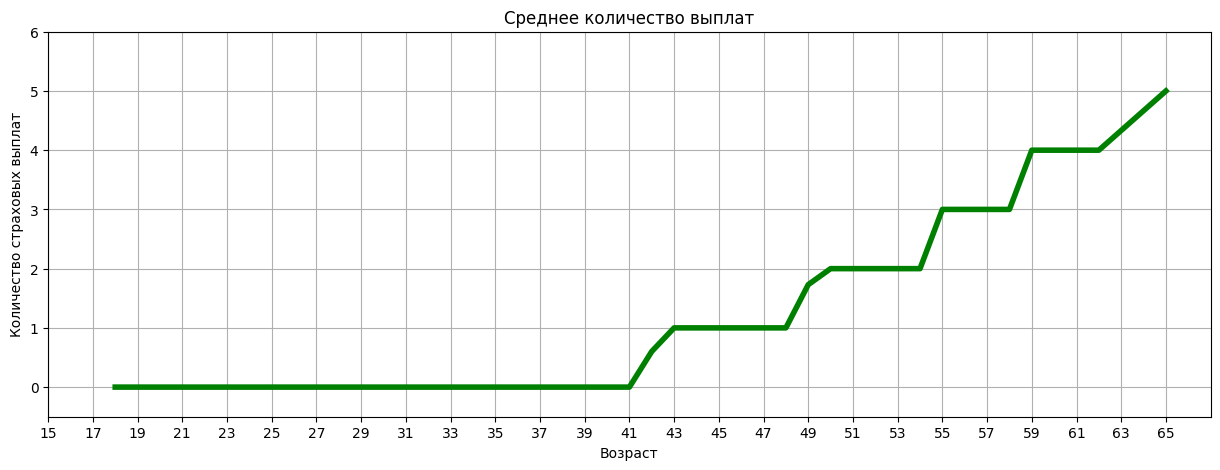

In [58]:
(df.groupby('Возраст').agg({'Страховые выплаты':'mean'})
                      .plot(
                            figsize=(15,5),
                            xlim=(15,67),
                            ylim= (-0.5,6),
                            xticks= range(15,67,2),
                            xlabel='Возраст',
                            ylabel='Количество страховых выплат',
                            title='Среднее количество выплат',
                            legend=False,
                            linewidth=4,
                            color='green',
                            grid=True))
plt.show()

**Выводы:**
 - в данных отсутсвуют пропуски и с ними можно работать;
 - наблюдается почти идеальный баланс между количеством мужчин и женщин в выборке;
 - возраст всех застрахованных лежит в диапазоне от 18 до 65 лет включительно;
 - средний возраст застрахованного 31 год, медиана 30 лет;
 - медиана зарплаты 40 000;
 - коэффициент корреляции между возрастом и количеством страховых выплат 0.651.
   При более детальном анализе по графику можно сделать вывод, что в среднем количество выплат в возрасте:
  - от 18 до 41 года  - 0 выплат;
  - от 42 до 48 лет - 1 выплата;
  - от 49 до 54 лет - 2 выплаты;
  - от 55 до 58 лет - 3 выплаты;
  - от 59 до 62 лет - 4 выплаты;
  - 65 лет - выплат.



# 2. Ответьте на вопрос и обоснуйте решение.
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

 a. Изменится. Приведите примеры матриц.

 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Обоснование:** $$(AB)^T = B^TA^T $$
$$(AB)^{-1} = B^{-1}A^{-1}$$
$$(AB)C = A(BC)$$  

 $w = (X^T X)^{-1} X^T y$. После умножения исходной матрицы признаков $X$ на произвольную обратимую матрицу $P$ получим следующее:

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (P^T (X^T X))^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} E  X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} X^T y (*)
$$

В нашем случае $ y = X P w $ подставим $y$ в (*)

$$
w' = P^{-1} (X^T X)^{-1} X^T X P w
$$
$$
w' = P^{-1} E P w
$$
$$
w' = E E w = w
$$

**Ответ:  После перемножения матрицы признаков на произвольную обратимую матрицу качество модели не изменится, так как получаем один и тот же вектор весов, а значит предсказания моделей будут одинаковыми.**

# 3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

**Алгоритм**

Будет реализован с помощью функции `transformation`. На вход этой функции будут подаваться признаки в виде датасета размерностью `m х n`. Далее этот датасет преобразовывается в матрицу такой же размерности. Следующим этапом будет добавление столбца в эту матрицу, состоящим из единиц(этот столбец будет первым в матрице). Размерность матрицы становится `m х n+1`. Далее эта матрица перемножается на случайную квадратную матрицу размера `n+1 х n+1`. После перемножения получаем матрицу `X` c размерностью `m х n+1`. Далее удаляем из матрицы `X` первый столбец и размерность матрицы становится `mхn`. На выходе функции получаем датасет с измененными признаками и такими же колонками как и во входном датасете.

Пусть $Z$ матрица признаков для, которых нужно предcказать целевую переменную, тогда предсказания для исходной матрицы признаков будут равны
 $a = Z*w$.

Предсказания для измененной матрицы признаков будут равны
$a' = Z*w'$, так как $w = w'$ получаем, что $a =a'$ , т.е. мы будем получать одинаковые предсказания для исходной матрицы признаков и измененной матрицы, а следовательно и метрики будут тоже равны.

In [59]:
def transformation(features):
    matrix = features.values
    X = np.concatenate((np.ones((features.shape[0],1)), matrix), axis=1)
    det = 0
    while det==0:
        matrix_random = np.random.random((features.shape[1]+1, features.shape[1]+1))
        det = np.linalg.det(matrix_random)
    X = X @ matrix_random
    X = np.delete(X,0,1)
    return pd.DataFrame(data = X, columns = features.columns)

Так же создадим функцию для расчета метрики `R2`. На вход этой функции будут подаваться целевой признак и признаки датасета. На выходе будем получать нужную метрику.

In [60]:
def calculate_r2(target, features):
    model = LinearRegression()
    model.fit(features, target)
    predictions = model.predict(features)
    return r2_score(target, predictions)

# 4. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

In [61]:
target = df['Страховые выплаты']
features = df.drop('Страховые выплаты', axis=1)

Преобразуем наши признаки `features`.

In [62]:
features_transformed = transformation(features)
print('Признаки после перемножения на обратимую матрицу')
display(features_transformed.head())
print('Исходные признаки')
display(features.head())

Признаки после перемножения на обратимую матрицу


,Пол,Возраст,Зарплата,Члены семьи
0,19277.445709,22038.297885,27888.058895,10861.810343
1,14779.334222,16892.203780,21376.286356,8321.618534
2,8170.033483,9336.917616,11815.935681,4599.122951
3,16197.170748,18520.893396,23437.102626,9130.840837
4,10149.062432,11600.402901,14679.730516,5716.392030


Исходные признаки


,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


Вычислим метрику `R2` для исходного датасета

In [63]:
result = calculate_r2(target, features)

Вычислим метрику `R2` для измененного датасета

In [64]:
result1 = calculate_r2(target, features1)

Оформим финальные резульаты в виде таблицы

In [65]:
result_table = pd.DataFrame([result, result1], index=['Исходного', 'Измененного'], columns = ['R2, датасета'])
display(result_table)

,"R2, датасета"
Исходного,0.424946
Измененного,0.424946


**Метрика `R2` не изменилась, значит после преобразования качество моделей машинного обучения также остается прежним.**